In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import csv
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
import os
from glob import glob

In [32]:
import keras
import keras.backend as k

In [33]:
os.listdir()

['.conda',
 '.gitconfig',
 '.ipynb',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.spyder-py3',
 '1.ipynb',
 '2.ipynb',
 '3D Objects',
 'amazon_review.py',
 'amazon_reviews_scraping',
 'Anaconda3',
 'AppData',
 'Application Data',
 'Areviews.csv',
 'Colnew.csv',
 'Contacts',
 'Cookies',
 'Default',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'final_project',
 'hugin.ini',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'logs',
 'MicrosoftEdgeBackups',
 'MINST DATA-Copy1.ipynb',
 'MNIST_data',
 'MURA-v1.1',
 'MURA-v1.1.zip',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{ce751a07-4845-11e9-a531-d3a78113f297}.TM.blf',
 'NTUSER.DAT{ce751a07-4845-11e9-a531-d3a78113f297}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{ce751a07-4845-11e9-a531-d3a78113f297}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'powerBI.ipynb',
 'PrintHood

In [34]:

PATH="MURA-v1.1/"

In [35]:

os.listdir(PATH)

['train',
 'train_image_paths.csv',
 'train_labeled_studies.csv',
 'valid',
 'valid_image_paths.csv',
 'valid_labeled_studies.csv']

In [36]:
train_imgs_path=pd.read_csv(PATH+'train_image_paths.csv')
train_labels=pd.read_csv(PATH+'train_labeled_studies.csv')
test_imgs_path=pd.read_csv(PATH+'valid_image_paths.csv')
test_labels=pd.read_csv(PATH+'valid_labeled_studies.csv')

In [37]:

train_imgs_path.head()

,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [38]:

train_imgs_path.shape

(36807, 1)

In [44]:

train_labels.head(20)

,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/,1
0,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00006/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,0
7,MURA-v1.1/train/XR_SHOULDER/patient00008/study...,1
8,MURA-v1.1/train/XR_SHOULDER/patient00009/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00010/study...,1


In [45]:

train_labels['1'].value_counts()

0    8280
1    5176
Name: 1, dtype: int64

In [46]:

test_imgs_path.head(30)

,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...
5,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...
6,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...
7,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...
8,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...
9,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...


In [47]:

test_imgs_path.shape

(3196, 1)

In [ ]:

for path in train_imgs_path.values[:10]:
    img=cv2.imread(path[:10])
    plt.imshow(plt.imread(path[:10]))
    plt.imshow(img)
    plt.show()
    print (img.shape)

In [55]:
train_labels['Body_Part']=train_labels['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study_Type']=train_labels['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['Body_Part']=test_labels['MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study_Type']=test_labels['MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/'].apply(lambda x: str(x.split('/')[4])[:6])

In [58]:

train_labels.head()

,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/,1,Body_Part,Study_Type
0,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00006/study...,1,SHOULDER,study1


In [59]:

test_labels.head()

,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/,1,Body_Part,Study_Type
0,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,WRIST,study1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,WRIST,study2
2,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,WRIST,study3
3,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,WRIST,study1
4,MURA-v1.1/valid/XR_WRIST/patient11188/study1_p...,1,WRIST,study1


In [60]:

import seaborn as sns

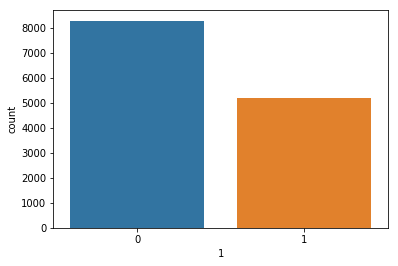

In [62]:

sns.countplot(train_labels['1'])

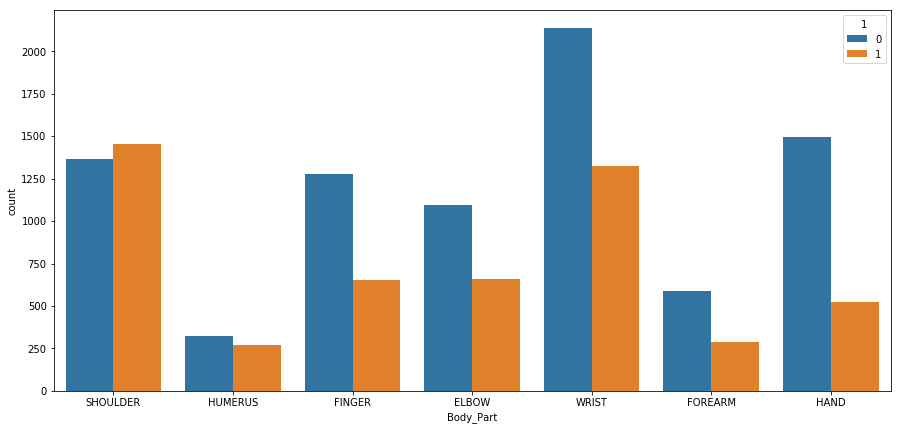

In [63]:

plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Body_Part',hue='1')

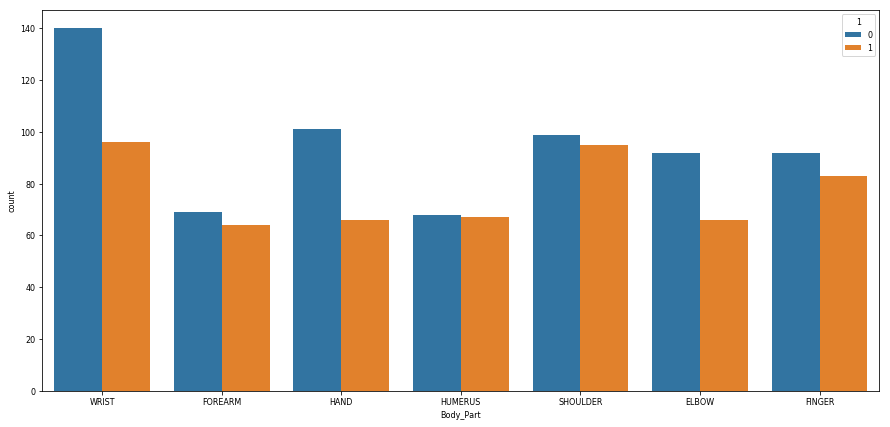

In [280]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Body_Part',hue='1')

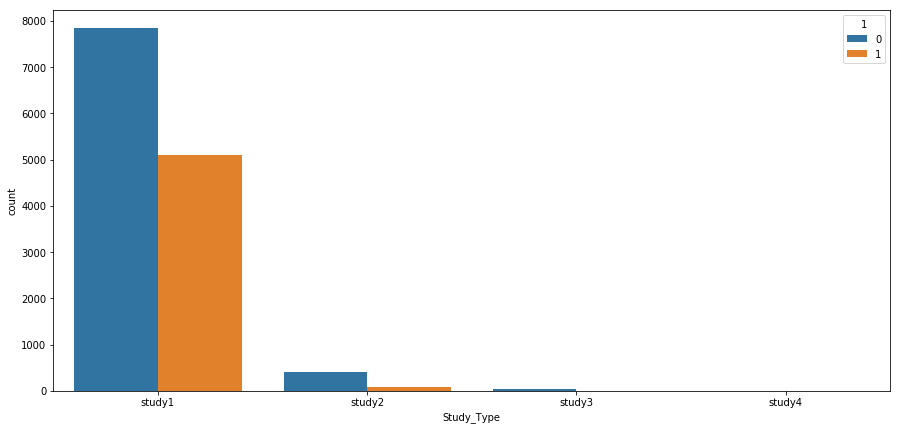

In [64]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Study_Type',hue='1')

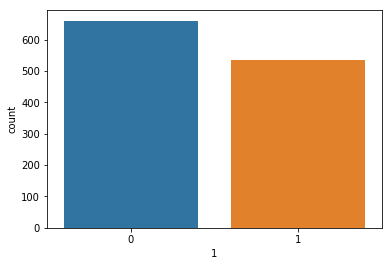

In [66]:

sns.countplot(test_labels['1'])

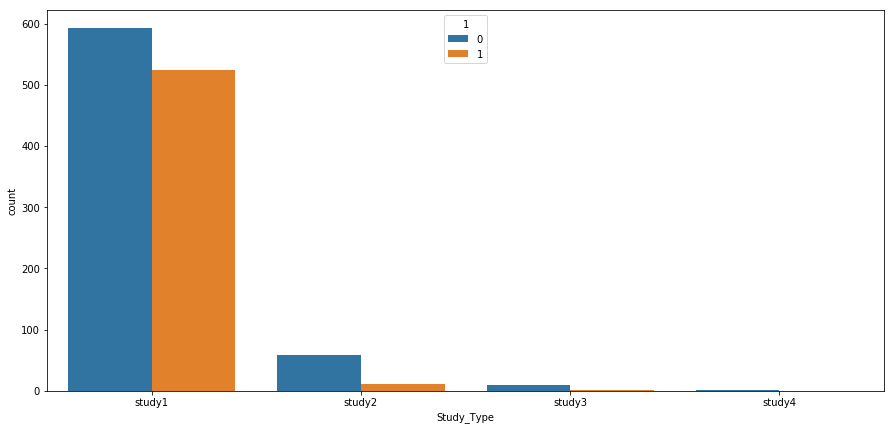

In [67]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Study_Type',hue='1')

In [68]:
from tqdm import tqdm
from PIL import Image

In [78]:
def read_image(Path):
    img=cv2.imread(Path)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(224,224))
    #print (img.shape)
    img=np.array(img)
    #img=np.resize(img,(224,224))
    #print (img.shape)
    img=img/255.
    return img


In [79]:
X_train=[]
X_val=[]

In [82]:
import torch

In [83]:
torch.cuda.is_available()

False

In [88]:
train_labels['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/']=train_imgs_path['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png']
test_labels['MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/']=test_imgs_path['MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png']

In [89]:
train_df=train_labels.groupby(['1']).apply(lambda x: x.sample(5000,replace=True))

In [90]:

train_df.shape

(10000, 4)

In [91]:

train_labels.shape

(13456, 4)

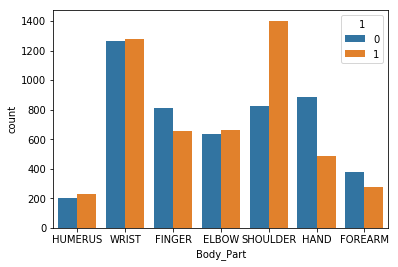

In [92]:

sns.countplot(data=train_df,x='Body_Part',hue='1')

In [109]:

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions

In [117]:

IMG_SIZE=(224,224)
def __init__(contrast_stretching=False,#####
histogram_equalization=False,#####
adaptive_equalization=False,#####
 data_format=None):
 if data_format is None:

   data_format = K.image_data_format()

   self.counter = 0

   self.contrast_stretching = contrast_stretching #####

   self.adaptive_equalization = adaptive_equalization #####

   self.histogram_equalization = histogram_equalization #####


In [273]:
datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    shear_range=0.4,
    zoom_range=0.4,
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

In [249]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [250]:
train_gen = flow_from_dataframe(datagen, train_df, 
                             path_col = 'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/',
                            y_col = '1', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 10000 images


In [251]:

valid_gen = flow_from_dataframe(datagen, test_labels, 
                             path_col = 'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/',
                            y_col = '1', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1198 images


In [252]:

test_X, test_Y = next(flow_from_dataframe(datagen, 
                               test_labels, 
                             path_col = 'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/',
                            y_col = '1', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)) # one big batch
# used a fixed dataset for final evaluation
final_test_X, final_test_Y = next(flow_from_dataframe(datagen, 
                            test_labels, 
                            path_col = 'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/',
                            y_col = '1',
                            target_size = IMG_SIZE,
                            color_mode = 'rgb',
                            batch_size = 64)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1198 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1198 images


In [253]:

t_x,t_y=next(train_gen)

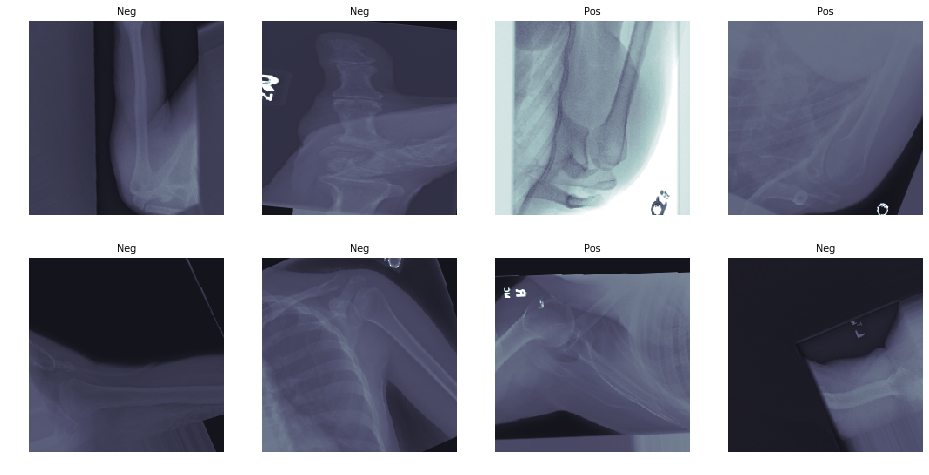

In [254]:
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%s' % ('Pos' if c_y>0.5 else 'Neg'))
    c_ax.axis('off')

In [255]:
from keras.layers import  Convolution2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import  Sequential


In [279]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = t_x.shape[1:]))
#if you resize the image above, change the input shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 54, 54, 64)        0         
__________

In [259]:
base_model=VGG16(input_shape=t_x.shape[1:],include_top=False,weights='imagenet')
base_model.trainable=False

In [260]:

base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [261]:
from keras.layers import *
from keras.models import *

In [262]:
pt_features = Input(base_model.get_output_shape_at(0)[1:], name = 'feature_input')
pt_depth = base_model.get_output_shape_at(0)[-1]

In [263]:
pt_features

<tf.Tensor 'feature_input_1:0' shape=(?, 7, 7, 512) dtype=float32>

In [264]:

pt_depth

512

In [275]:
bn_features = BatchNormalization()(pt_features)
# here we do an attention mechanism to turn pixels in the GAP on an off
attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(32, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = AvgPool2D((2,2), strides = (1,1), padding = 'same')(attn_layer) # smooth results
attn_layer = Conv2D(1, 
                    kernel_size = (1,1), 
                    padding = 'valid', 
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.5)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'sigmoid')(dr_steps)

attn_model = Model(inputs = [pt_features], outputs = [out_layer], name = 'attention_model')

attn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])

attn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
feature_input (InputLayer)      (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 7, 7, 512)    2048        feature_input[0][0]              
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 7, 7, 128)    65664       batch_normalization_3[0][0]      
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 7, 7, 32)     4128        conv2d_29[0][0]                  
__________________________________________________________________________________________________
conv2d_31 

In [277]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cardio_attn')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=10) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [278]:
from keras.optimizers import Adam
from keras.util.Sequence import Sequence

ModuleNotFoundError: No module named 'keras.util'

In [268]:
model = Sequential(name = 'combined_model')
model.add(base_model)
model.add(attn_model)
model.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
attention_model (Model)      (None, 1)                 138690    
Total params: 14,853,378
Trainable params: 137,154
Non-trainable params: 14,716,224
_________________________________________________________________


In [272]:
train_gen.batch_size = 64
model.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y), 
                    steps_per_epoch=100,
                      epochs = 3, 
                      callbacks = callbacks_list,
                      workers = 3)

Epoch 1/3
100/100 [==============================] - ETA: 47:13 - loss: 0.6176 - binary_accuracy: 0.57 - ETA: 41:46 - loss: 0.6248 - binary_accuracy: 0.60 - ETA: 39:32 - loss: 0.6442 - binary_accuracy: 0.61 - ETA: 38:02 - loss: 0.6518 - binary_accuracy: 0.60 - ETA: 36:58 - loss: 0.6575 - binary_accuracy: 0.60 - ETA: 36:14 - loss: 0.6750 - binary_accuracy: 0.59 - ETA: 35:27 - loss: 0.6660 - binary_accuracy: 0.59 - ETA: 34:53 - loss: 0.6645 - binary_accuracy: 0.58 - ETA: 34:19 - loss: 0.6683 - binary_accuracy: 0.59 - ETA: 33:47 - loss: 0.6717 - binary_accuracy: 0.59 - ETA: 33:12 - loss: 0.6744 - binary_accuracy: 0.58 - ETA: 32:38 - loss: 0.6749 - binary_accuracy: 0.58 - ETA: 32:05 - loss: 0.6715 - binary_accuracy: 0.59 - ETA: 31:53 - loss: 0.6768 - binary_accuracy: 0.58 - ETA: 31:35 - loss: 0.6808 - binary_accuracy: 0.58 - ETA: 31:09 - loss: 0.6837 - binary_accuracy: 0.57 - ETA: 30:56 - loss: 0.6820 - binary_accuracy: 0.57 - ETA: 30:26 - loss: 0.6802 - binary_accuracy: 0.58 - ETA: 30:04 

100/100 [==============================] - ETA: 8:45 - loss: 0.6857 - binary_accuracy: 0.687 - ETA: 21:16 - loss: 0.6466 - binary_accuracy: 0.66 - ETA: 25:11 - loss: 0.6639 - binary_accuracy: 0.63 - ETA: 27:25 - loss: 0.6786 - binary_accuracy: 0.62 - ETA: 28:51 - loss: 0.6792 - binary_accuracy: 0.63 - ETA: 29:15 - loss: 0.6747 - binary_accuracy: 0.62 - ETA: 29:30 - loss: 0.6789 - binary_accuracy: 0.62 - ETA: 29:39 - loss: 0.6809 - binary_accuracy: 0.62 - ETA: 29:38 - loss: 0.6774 - binary_accuracy: 0.62 - ETA: 31:29 - loss: 0.6757 - binary_accuracy: 0.62 - ETA: 32:00 - loss: 0.6699 - binary_accuracy: 0.62 - ETA: 31:39 - loss: 0.6707 - binary_accuracy: 0.62 - ETA: 31:36 - loss: 0.6669 - binary_accuracy: 0.62 - ETA: 31:25 - loss: 0.6667 - binary_accuracy: 0.62 - ETA: 31:14 - loss: 0.6680 - binary_accuracy: 0.62 - ETA: 31:02 - loss: 0.6698 - binary_accuracy: 0.61 - ETA: 30:44 - loss: 0.6718 - binary_accuracy: 0.61 - ETA: 30:23 - loss: 0.6726 - binary_accuracy: 0.61 - ETA: 30:15 - loss: 0.

100/100 [==============================] - ETA: 41:19 - loss: 0.5472 - binary_accuracy: 0.70 - ETA: 43:49 - loss: 0.6087 - binary_accuracy: 0.71 - ETA: 43:23 - loss: 0.6281 - binary_accuracy: 0.67 - ETA: 42:43 - loss: 0.6432 - binary_accuracy: 0.64 - ETA: 42:30 - loss: 0.6505 - binary_accuracy: 0.65 - ETA: 42:10 - loss: 0.6574 - binary_accuracy: 0.64 - ETA: 41:48 - loss: 0.6637 - binary_accuracy: 0.63 - ETA: 41:17 - loss: 0.6719 - binary_accuracy: 0.62 - ETA: 40:49 - loss: 0.6742 - binary_accuracy: 0.62 - ETA: 40:32 - loss: 0.6713 - binary_accuracy: 0.62 - ETA: 40:31 - loss: 0.6654 - binary_accuracy: 0.62 - ETA: 40:29 - loss: 0.6598 - binary_accuracy: 0.63 - ETA: 40:21 - loss: 0.6634 - binary_accuracy: 0.62 - ETA: 40:08 - loss: 0.6641 - binary_accuracy: 0.61 - ETA: 40:00 - loss: 0.6592 - binary_accuracy: 0.62 - ETA: 39:42 - loss: 0.6572 - binary_accuracy: 0.62 - ETA: 39:07 - loss: 0.6561 - binary_accuracy: 0.62 - ETA: 38:39 - loss: 0.6553 - binary_accuracy: 0.62 - ETA: 38:08 - loss: 0.